In [39]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
# Step 1: Load Data
customers = pd.read_csv("/content/Transactions.csv")
transactions = pd.read_csv("/content/Transactions.csv")

In [42]:
# Merge transactions with customers
df = transactions.merge(customers, on='CustomerID', how='left')

# Verify column names in the merged DataFrame
print(df.columns)


Index(['TransactionID_x', 'CustomerID', 'ProductID_x', 'TransactionDate_x',
       'Quantity_x', 'TotalValue_x', 'Price_x', 'TransactionID_y',
       'ProductID_y', 'TransactionDate_y', 'Quantity_y', 'TotalValue_y',
       'Price_y'],
      dtype='object')


In [44]:
# Adjust aggregation based on actual column names in 'df'
customer_transactions = df.groupby('CustomerID').agg({
    'Quantity_x': 'sum',
    'TotalValue_x': 'sum',
    'TransactionID_x': 'count'  # Adjusted to count transactions
}).reset_index()

# Rename columns for clarity
customer_transactions.rename(columns={'TransactionID_x': 'NumTransactions'}, inplace=True)

# Merge aggregated data with customer profiles
customer_profiles = customers.merge(customer_transactions, on='CustomerID', how='left')

# Fill NaN values with 0 (if any)
customer_profiles.fillna(0, inplace=True)

# Verify the merged DataFrame and its columns
print(customer_profiles.head())
print(customer_profiles.columns)


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  Quantity_x  TotalValue_x  NumTransactions  
0      300.68  300.68          36       7917.12               16  
1      300.68  300.68          32      10283.20               16  
2      300.68  300.68          66      19397.28               36  
3      601.36  300.68         154      46229.61               49  
4      902.04  300.68          48      12501.96               16  
Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price', 'Quantity_x', 'TotalValue_x',
       'NumTransactions'],
  

In [45]:
# Select features for clustering
features = ['Quantity_x', 'TotalValue_x', 'NumTransactions']

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(customer_profiles[features])


In [46]:
# Set number of clusters
num_clusters = 5  # Example: you can choose between 2 and 10

# Perform KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
customer_profiles['Cluster'] = kmeans.fit_predict(features_scaled)


In [47]:
# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(features_scaled, customer_profiles['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

# Calculate other relevant metrics (e.g., Inertia)
inertia = kmeans.inertia_
print(f'Inertia: {inertia}')


Davies-Bouldin Index: 0.8654624089872659
Inertia: 349.1720476650248


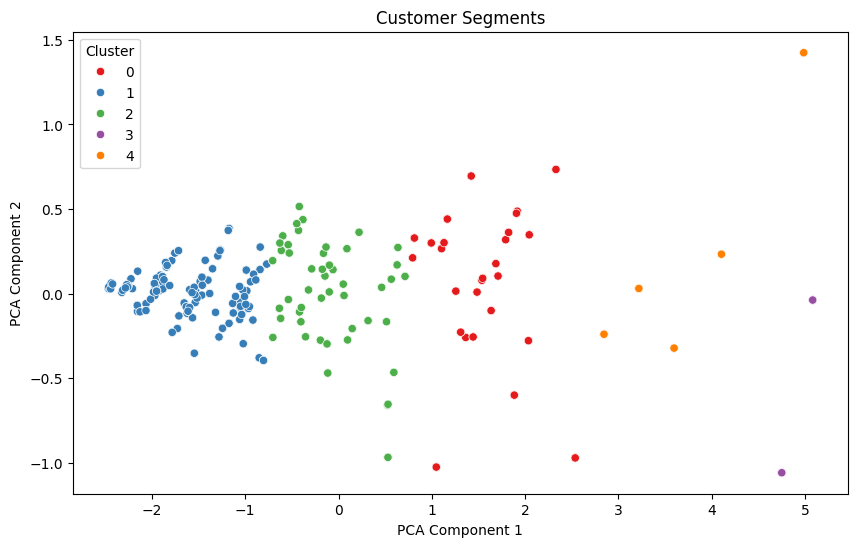

In [48]:
# Plot clusters in a 2D space (using PCA for dimensionality reduction if needed)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'PCA1': features_pca[:, 0],
    'PCA2': features_pca[:, 1],
    'Cluster': customer_profiles['Cluster']
})

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_data, x='PCA1', y='PCA2', hue='Cluster', palette='Set1')
plt.title('Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()
